# Algorytmy Grafowe - najktrotsza sciezka w grafie

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

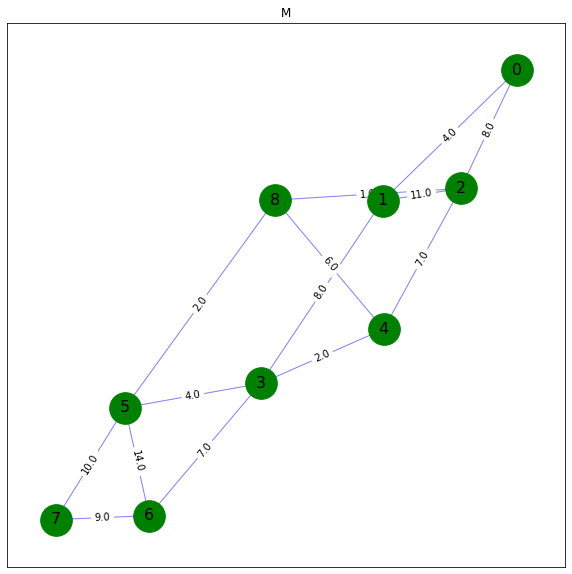

In [3]:
weights = [
    (0, 1, 4),
    (0, 7, 8),
    (1, 7, 11),
    (2, 1, 8),
    (2, 8, 2),
    (2, 5, 4),
    (2, 3, 7),
    (3, 4, 9),
    (3, 5, 14),
    (4, 5, 10),
    (5, 6, 2),
    (6, 8, 6),
    (6, 7, 1),
    (7, 8, 7),
]

G = nx.Graph()
G.add_weighted_edges_from(weights)
M = nx.to_numpy_array(G)
G = nx.Graph(M)

fig = plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=[i for i in range(9)], node_color='g', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1,alpha=0.5,edge_color='b')

nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels = nx.get_edge_attributes(G,'weight'))
nx.draw_networkx_labels(G, pos, font_size=16)

plt.title("M")
plt.show()

In [4]:
def bellmanFordAlgorithm(M, start):
    n = len(M)
    prev = [None for _ in range(n)]
    d = [np.inf for _ in range(n)]
    d[start] = 0

    for i in range(n):
        for j in range(n):
            if d[j] > d[i] + M[i][j] and M[i][j] > 0:
                d[j] = d[i] + M[i][j]
                prev[j] = i
    
    return d, prev


In [5]:
def getPath(prev, start, end):
    i = start
    j = end
    res = []
    while i != j:
        res.append((prev[j], j))
        j = prev[j]
    
    return res

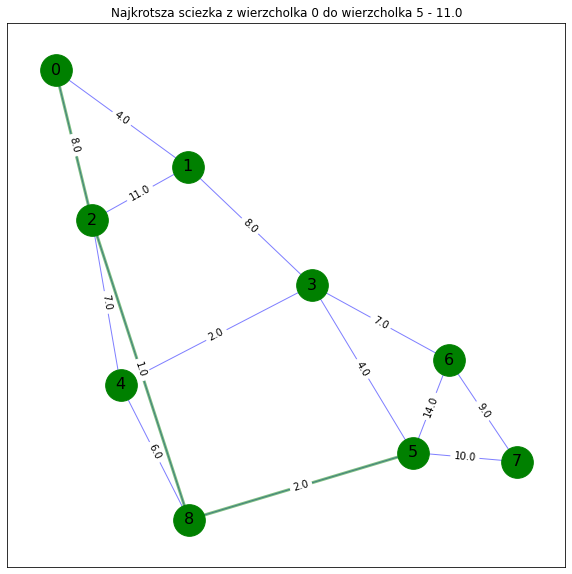

In [6]:
M = nx.to_numpy_array(G)

start = 0
end = 5

distances, prev = bellmanFordAlgorithm(M, start)

edgeList = getPath(prev, start, end)

G = nx.Graph(M)

fig = plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G)


nx.draw_networkx_nodes(G, pos, nodelist=[i for i in range(9)], node_color='g', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1,alpha=0.5,edge_color='b')
nx.draw_networkx_edges(G, pos, edgelist=edgeList, width=3, alpha=0.5,edge_color='g')

nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels = nx.get_edge_attributes(G,'weight'))
nx.draw_networkx_labels(G, pos, font_size=16)

plt.title(f"Najkrotsza sciezka z wierzcholka {start} do wierzcholka {end} - {distances[end]}")
plt.show()

## Algorytm A*


In [13]:
# Stowrzylem kolejke priorytetowa ktorej priorytet to bedzie odleglosc wierzcholka od celu + koszt przejscia
class PriorityQueue:
    def __init__(self):
        self.queue = []

    def enqueue(self, val, priority):
        self.queue.append((val, priority))
        self.queue.sort(key=lambda x: x[1])
    
    def dequeue(self):
        return self.queue.pop(0)[0]
    
    def is_empty(self):
        return len(self.queue) == 0


In [14]:

def heuristic(a, b) -> float:
    return abs(a - b)


def a_star_search(M, start, goal):
    n = len(M) # Ilosc wierzcholkow
    # Tworze kolejke priorytetowa, ktora jako priorytet bierze odleglosc wierzcholka
    queue = PriorityQueue()
    queue.enqueue(start, 0)

    prev = [None for _ in range(n)]
    distances = [np.inf for _ in range(n)]

    distances[start] = 0
    prev[start] = start

    while not queue.is_empty():
        # Pobieram z kolejki kolejny wierzcholek
        current = queue.dequeue()

        # Jezeli wierzcholek jest rozwiazaniem to koncze petle
        if current == goal:
            break

        # Iteruje po mozliwych przejsciach bierzacego wierzcholka
        for i in range(n):
            if M[current][i] > 0:
                # Obliczam koszt przejscia do kolejnego wierzcholka
                new_cost = distances[current] + M[current][i]
                if new_cost < distances[i]:
                    distances[i] = new_cost
                    # Ustalam priorytet jako koszt przejscia + wartosc funkcji heurystyki
                    priority  = new_cost + heuristic(i, goal)
                    # Dodaje wierzcholek do kolejki
                    queue.enqueue(i, priority)
                    prev[i] = current

    return prev, distances


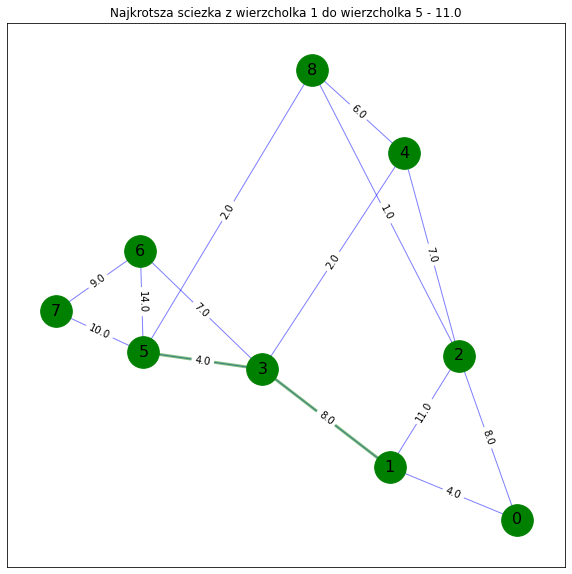

In [15]:

start = 1
end = 5

prev, distance = a_star_search(M, start, end)

edgeList = getPath(prev, start, end)


fig = plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G)


nx.draw_networkx_nodes(G, pos, nodelist=[i for i in range(9)], node_color='g', node_size=1000)
nx.draw_networkx_edges(G, pos, width=1,alpha=0.5,edge_color='b')
nx.draw_networkx_edges(G, pos, edgelist=edgeList, width=3, alpha=0.5,edge_color='g')

nx.draw_networkx_edge_labels(G, pos, font_size=10, edge_labels = nx.get_edge_attributes(G,'weight'))
nx.draw_networkx_labels(G, pos, font_size=16)

plt.title(f"Najkrotsza sciezka z wierzcholka {start} do wierzcholka {end} - {distances[end]}")
plt.show()

Dodatkowo stworzylem wizualizacje dzialania algorytmu i umiescilem ja na swoim githubie https://djmmatracki.github.io/A_star_algorithm/.

# Zadanie 2

Z punktu dzialania algorytmu waznymi wlasnosciami grafu moze byc ilosc krawedzi.

# Zadanie 3

Zlozonosc obliczeniowa Algorytmu Bellmana-Forda to $O(|V| \cdot |E|)$

Pesymistyczna zlozonosc obliczeniowa algorytmu A star $O(|E|)$
Pesymistyczna zlozonosc pamieciowa algorytmu A star wynosi $O(|V|)$